In [42]:
import numpy as np
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

In [44]:
import urllib.request

In [45]:
raw_data = urllib.request.urlopen(url)
raw_data

In [46]:
data = np.loadtxt(raw_data, delimiter=",")
data

array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 6.100e+01, 2.780e+02,
        1.000e+00],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
        0.000e+00],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
        0.000e+00]])

In [47]:
len(data)

4601

In [48]:
data.shape

(4601, 58)

In [49]:
X = data[:, :48]

In [50]:
y = data[:, -1:]
y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scores = {}


In [52]:
Gauss = naive_bayes.GaussianNB()



Gauss.fit(X_train, y_train)

y_pred = Gauss.predict(X_test)

scores['GaussAcc'] = accuracy_score(y_pred, y_test)

c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
MultiNB = naive_bayes.MultinomialNB()



MultiNB.fit(X_train, y_train)

y_pred = MultiNB.predict(X_test)

scores['MultiAcc'] = accuracy_score(y_pred, y_test)


c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
CompNB = naive_bayes.ComplementNB()



CompNB.fit(X_train, y_train)

y_pred = CompNB.predict(X_test)

scores['CompAcc'] = accuracy_score(y_pred, y_test)


c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
BernNB = naive_bayes.BernoulliNB()



BernNB.fit(X_train, y_train)

y_pred = BernNB.predict(X_test)

scores['BernAcc'] = accuracy_score(y_pred, y_test)


c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
X[0]

array([0.  , 0.64, 0.64, 0.  , 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.64, 0.  , 0.  , 0.  , 0.32, 0.  , 1.29, 1.93, 0.  , 0.96, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

In [57]:
BernNBB = naive_bayes.BernoulliNB(binarize=0.1)



BernNBB.fit(X_train, y_train)

y_pred = BernNBB.predict(X_test)

scores['BernBAcc'] = accuracy_score(y_pred, y_test)


c:\users\faizan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
scores

{'GaussAcc': 0.8023887079261672,
 'MultiAcc': 0.8707926167209555,
 'CompAcc': 0.8610206297502715,
 'BernAcc': 0.8794788273615635,
 'BernBAcc': 0.8903365906623235}

In [61]:
score = []
names = []
for key, val in scores.items():
    names.append(key)
    score.append(val)
score

[0.8023887079261672,
 0.8707926167209555,
 0.8610206297502715,
 0.8794788273615635,
 0.8903365906623235]

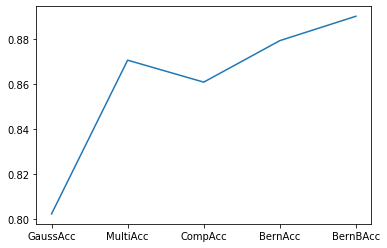

In [62]:
plt.plot(names, score)